In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/exRNA


In [21]:
import pandas as pd
import os
from functools import reduce
import seaborn as sns
sns.set()

In [106]:
features = []
runs = []
dataset = 'piranha_peaks'
input_dir = 'output/feature_selection/select_robust/{}'.format(dataset)
for filename in os.listdir(input_dir):
    run_info = pd.Series(filename.split('.'),
                         index= ['scaler', 'classifier', 'n_select', 'rfe', 'resample_method'])
    if not (run_info['classifier'].startswith('random_forest') and (run_info['resample_method'] == 'bootstrap') and (run_info['n_select'] == '100')):
        continue
    #if not ((run_info['resample_method'] == 'jackknife') and (run_info['n_select'] == '100')):
    #    continue
    df = pd.read_table(os.path.join(input_dir, filename, 'features.txt'), 
                             header=None)
    features.append(df.iloc[:, 0])
    runs.append(filename)

In [107]:
run_info = pd.Series(runs, index=runs).str.split('.', expand=True)
run_info.columns = ['scaler', 'classifier', 'n_select', 'rfe', 'resample_method']
run_info.head()

,scaler,classifier,n_select,rfe,resample_method
robust.random_forest_rfe.100.0.bootstrap,robust,random_forest_rfe,100,0,bootstrap
min_max.random_forest.100.1.bootstrap,min_max,random_forest,100,1,bootstrap
max_abs.random_forest_rfe.100.0.bootstrap,max_abs,random_forest_rfe,100,0,bootstrap
min_max.random_forest_rfe.100.0.bootstrap,min_max,random_forest_rfe,100,0,bootstrap
max_abs.random_forest_rfe.100.1.bootstrap,max_abs,random_forest_rfe,100,1,bootstrap


union size of all features: 90


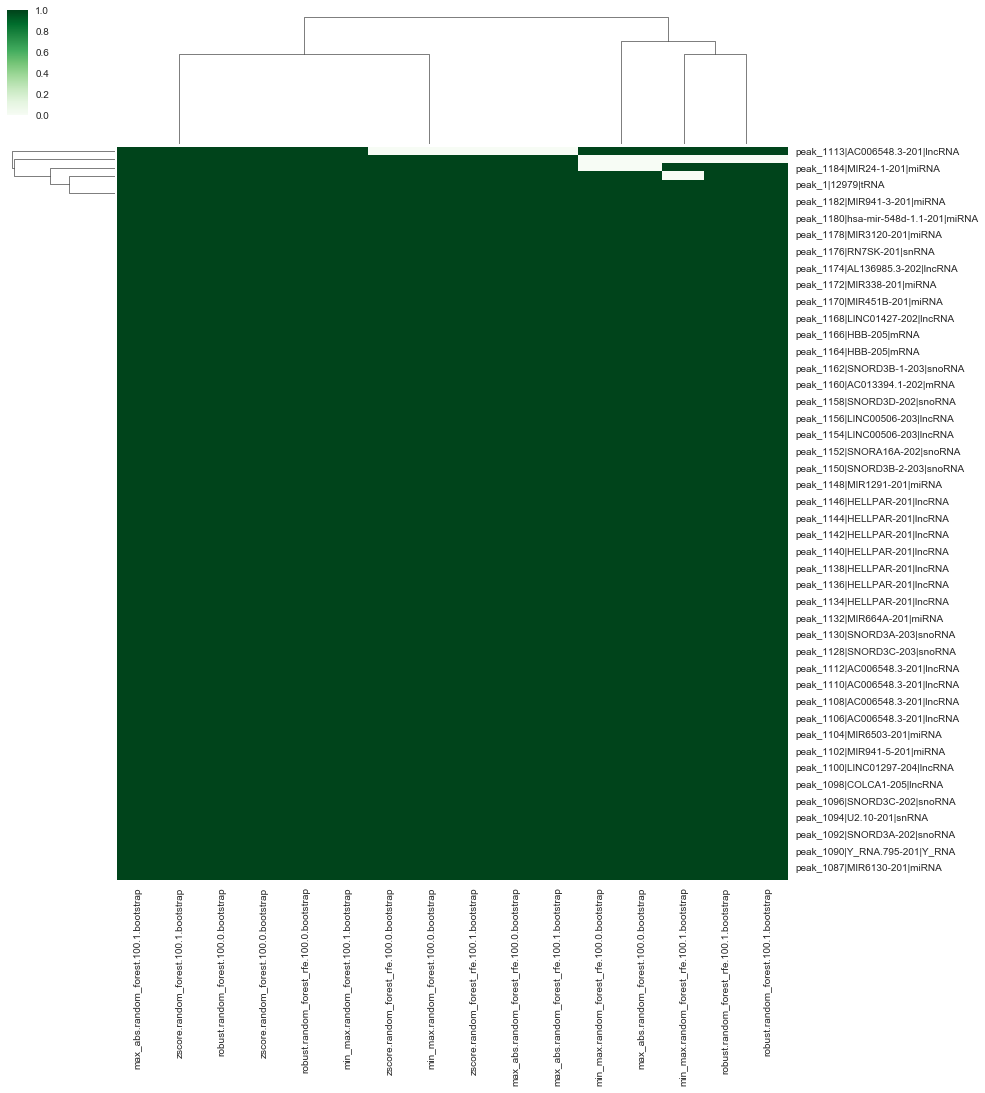

In [108]:
features_union = reduce(np.union1d, features)
print('union size of all features: {}'.format(features_union.shape[0]))
m = pd.DataFrame(np.zeros((len(features_union), len(runs)), dtype=np.int32),
             columns=runs,
             index=features_union)
for run, feature in zip(runs, features):
    m.loc[feature, run] = 1
m = m.loc[m.sum(axis=1) >= 0.5*m.shape[1]]
#plt.subplots(figsize=(15, 20))
sns.clustermap(m, cmap=cm.Greens, figsize=(14, 16))
selected_features = m.index.to_series()
#selected_features.to_csv('output/feature_selection/validation/random_forest.{}.txt'.format(dataset),
#                         index=False, header=False)

In [110]:
print(m.shape[0])

88


In [ ]:
for filename in os.listdir(input_dir):
    run_info = pd.Series(filename.split('.'),
                         index= ['scaler', 'classifier', 'n_select', 'rfe', 'resample_method'])
    #if not ((run_info['resample_method'] == 'jackknife') and (run_info['n_select'] == '100')):
    #    continue
    df = pd.read_table(os.path.join(input_dir, filename, 'features.txt'), 
                             header=None)
    features.append(df.iloc[:, 0])
    runs.append(filename)